In [14]:
import evoc
import APALD

from sklearn.datasets import make_blobs, fetch_openml
from sklearn.metrics import adjusted_rand_score as ari
import matplotlib.pyplot as plt

import time

In [2]:
def compare(data, labels):
    evoc_start = time.time()
    evoc_clusters = evoc.EVoC(noise_level=0.01).fit_predict(data)
    evoc_ari = ari(labels, evoc_clusters)
    print(f"EVoC ARI: {round(evoc_ari, 3)}  EVoC Time: {time.time() - evoc_start}")

    apald_start = time.time()
    apald_clusters = APALD.APALD().fit_predict(data)
    apald_ari = ari(labels, apald_clusters)
    print(f"APALD ARI: {round(apald_ari, 3)}  APALD Time: {time.time() - apald_start}")

    evoc_apald_ari = ari(evoc_clusters, apald_clusters)
    return evoc_ari, apald_ari, evoc_apald_ari

## Try first on some blobs (Taken directly from EVoC docs)

In [3]:
%%time
data, labels = make_blobs(n_samples=100_000, n_features=1024, centers=100)

CPU times: user 2.22 s, sys: 198 ms, total: 2.42 s
Wall time: 2.46 s


In [4]:
evoc_blobs, apald_blobs, evoc_apald_blobs = compare(data, labels)

EVoC ARI: 1.0  EVoC Time: 13.55263614654541
APALD ARI: 0.988  APALD Time: 210.40688705444336


## MNIST

In [5]:
%%time
data, labels = fetch_openml('mnist_784', version=1, return_X_y=True)

CPU times: user 2.29 s, sys: 437 ms, total: 2.72 s
Wall time: 3.01 s


In [6]:
evoc_mnist, apald_mnist, evoc_apald_mnist = compare(data, labels)

EVoC ARI: 0.94  EVoC Time: 3.96337890625
APALD ARI: 0.851  APALD Time: 133.18046474456787


## Fashion MNIST

In [7]:
data, labels = fetch_openml('Fashion-MNIST', version=1, return_X_y=True)

In [8]:
evoc_fashion, apald_fashion, evoc_apald_fashion = compare(data, labels)

EVoC ARI: 0.392  EVoC Time: 4.53835129737854
APALD ARI: 0.319  APALD Time: 128.67119693756104


## Hill Valley

In [9]:
%%time
data, labels = fetch_openml('hill-valley', version=1, return_X_y=True)

CPU times: user 21.7 ms, sys: 12.7 ms, total: 34.4 ms
Wall time: 38 ms


In [10]:
evoc_hill, apald_hill, evoc_apald_hill = compare(data, labels)

EVoC ARI: 0.265  EVoC Time: 0.0663919448852539
APALD ARI: 0.191  APALD Time: 1.8161647319793701


## Devnagari-Script

In [11]:
%%time
data, labels = fetch_openml('Devnagari-Script', version=1, return_X_y=True)

CPU times: user 4.05 s, sys: 522 ms, total: 4.58 s
Wall time: 4.66 s


In [12]:
evoc_devnagari, apald_devnagari, evoc_apald_devnagari = compare(data, labels)

EVoC ARI: 0.173  EVoC Time: 5.645967960357666
APALD ARI: 0.386  APALD Time: 173.30776381492615


## Make some Plots

(0.0, 1.2)

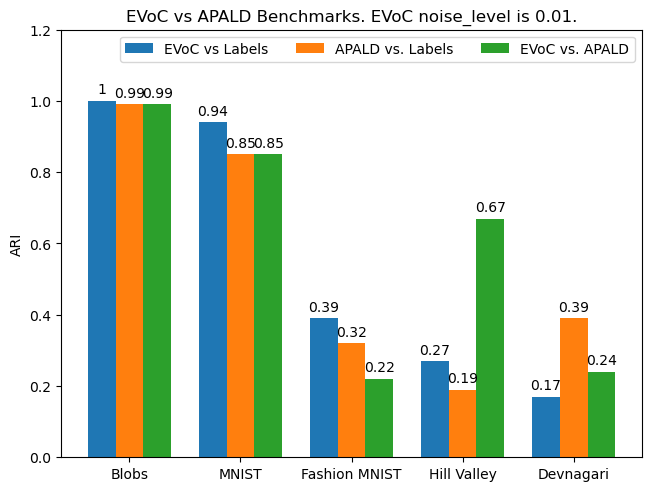

In [20]:
datasets = ("Blobs", "MNIST", "Fashion MNIST", "Hill Valley", "Devnagari")
comparisons = {
    "EVoC vs Labels": [round(x, 2) for x in [evoc_blobs, evoc_mnist, evoc_fashion, evoc_hill, evoc_devnagari]],
    "APALD vs. Labels": [round(x, 2) for x in [apald_blobs, apald_mnist, apald_fashion, apald_hill, apald_devnagari]],
    "EVoC vs. APALD": [round(x, 2) for x in [evoc_apald_blobs, evoc_apald_mnist, evoc_apald_fashion, evoc_apald_hill, evoc_apald_devnagari]],
}

xs = list(range(len(datasets)))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')
for attribute, measurement in comparisons.items():
    offset = width * multiplier
    rects = ax.bar([x + offset for x in xs], measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_title('EVoC vs APALD Benchmarks. EVoC noise_level is 0.01.')
ax.set_ylabel('ARI')
ax.set_xticks([x + width for x in xs], datasets)
ax.legend(loc='upper right', ncols=3)
ax.set_ylim(0, 1.2)